# Task5: ARIMA modeling and prediction

In [1]:
import pandas as pd

data = pd.DataFrame([[1880,-0.4], [1881,-0.37], [1882,-0.43], [1883,-0.47], [1884,-0.72], [1885,-0.54],
[1886,-0.47], [1887,-0.54], [1888,-0.39], [1889,-0.19], [1890,-0.4], [1891,-0.44], [1892,-0.44], [1893,-0.49], [1894,-
0.38], [1895,-0.41], [1896,-0.27], [1897,-0.18], [1898,-0.38], [1899,-0.22], [1900,-0.03], [1901,-0.09], [1902,-0.28],
[1903,-0.36], [1904,-0.49], [1905,-0.25], [1906,-0.17], [1907,-0.45], [1908,-0.32], [1909,-0.33], [1910,-0.32], [1911,-
0.29], [1912,-0.32], [1913,-0.25], [1914,-0.05], [1915,-0.01], [1916,-0.26], [1917,-0.48], [1918,-0.37], [1919,-0.2],
[1920,-0.15], [1921,-0.08], [1922,-0.14], [1923,-0.13], [1924,-0.12], [1925,-0.1], [1926,0.13], [1927,-0.01], [1928,0.06],
[1929,-0.17], [1930,-0.01], [1931,0.09], [1932,0.05], [1933,-0.16], [1934,0.05], [1935,-0.02], [1936,0.04], [1937,0.17],
[1938,0.19], [1939,0.05], [1940,0.15], [1941,0.13], [1942,0.09], [1943,0.04], [1944,0.11], [1945,-0.03], [1946,0.03],
[1947,0.15], [1948,0.04], [1949,-0.02], [1950,-0.13], [1951,0.02], [1952,0.07], [1953,0.2], [1954,-0.03], [1955,-0.07],
[1956,-0.19], [1957,0.09], [1958,0.11], [1959,0.06], [1960,0.01], [1961,0.08], [1962,0.02], [1963,0.02], [1964,-0.27],
[1965,-0.18], [1966,-0.09], [1967,-0.02], [1968,-0.13], [1969,0.02], [1970,0.03], [1971,-0.12], [1972,-0.08], [1973,0.17],
[1974,-0.09], [1975,-0.04], [1976,-0.24], [1977,-0.16], [1978,-0.09], [1979,0.12], [1980,0.27], [1981,0.42], [1982,0.02],
[1983,0.3], [1984,0.09], [1985,0.05]], columns = ["year", "temperature change"])

data.to_csv('temperature.csv')

       lb_stat     lb_pvalue
1    65.914271  4.709690e-16
2   114.149261  1.632311e-25
3   151.955524  9.974838e-33
4   189.507131  6.764012e-40
5   220.874422  9.652744e-46
6   253.060924  9.093751e-52
7   276.676346  5.742962e-56
8   301.607312  1.873081e-60
9   324.274857  1.832207e-64
10  350.976775  2.472290e-69
11  374.902685  1.289892e-73
12  396.589094  1.996084e-77
13  413.496871  3.145281e-80
14  429.383941  8.058888e-83
15  441.085787  1.559343e-84
16  450.661799  8.336636e-86
17  457.878481  1.374228e-86
18  465.250863  2.065027e-87
19  471.951769  4.222783e-88
20  481.566250  2.091996e-89
(-1.9091315185935507, 0.32777762531437804, 7, 98, {'1%': -3.4989097606014496, '5%': -2.891516256916761, '10%': -2.5827604414827157}, -115.0527794599316)
(-6.437287387132176, 1.6408522350646525e-08, 6, 98, {'1%': -3.4989097606014496, '5%': -2.891516256916761, '10%': -2.5827604414827157}, -111.42954365778667)
     lb_stat  lb_pvalue
1   0.065709   0.797690
2   0.093045   0.954543
3   0.0978

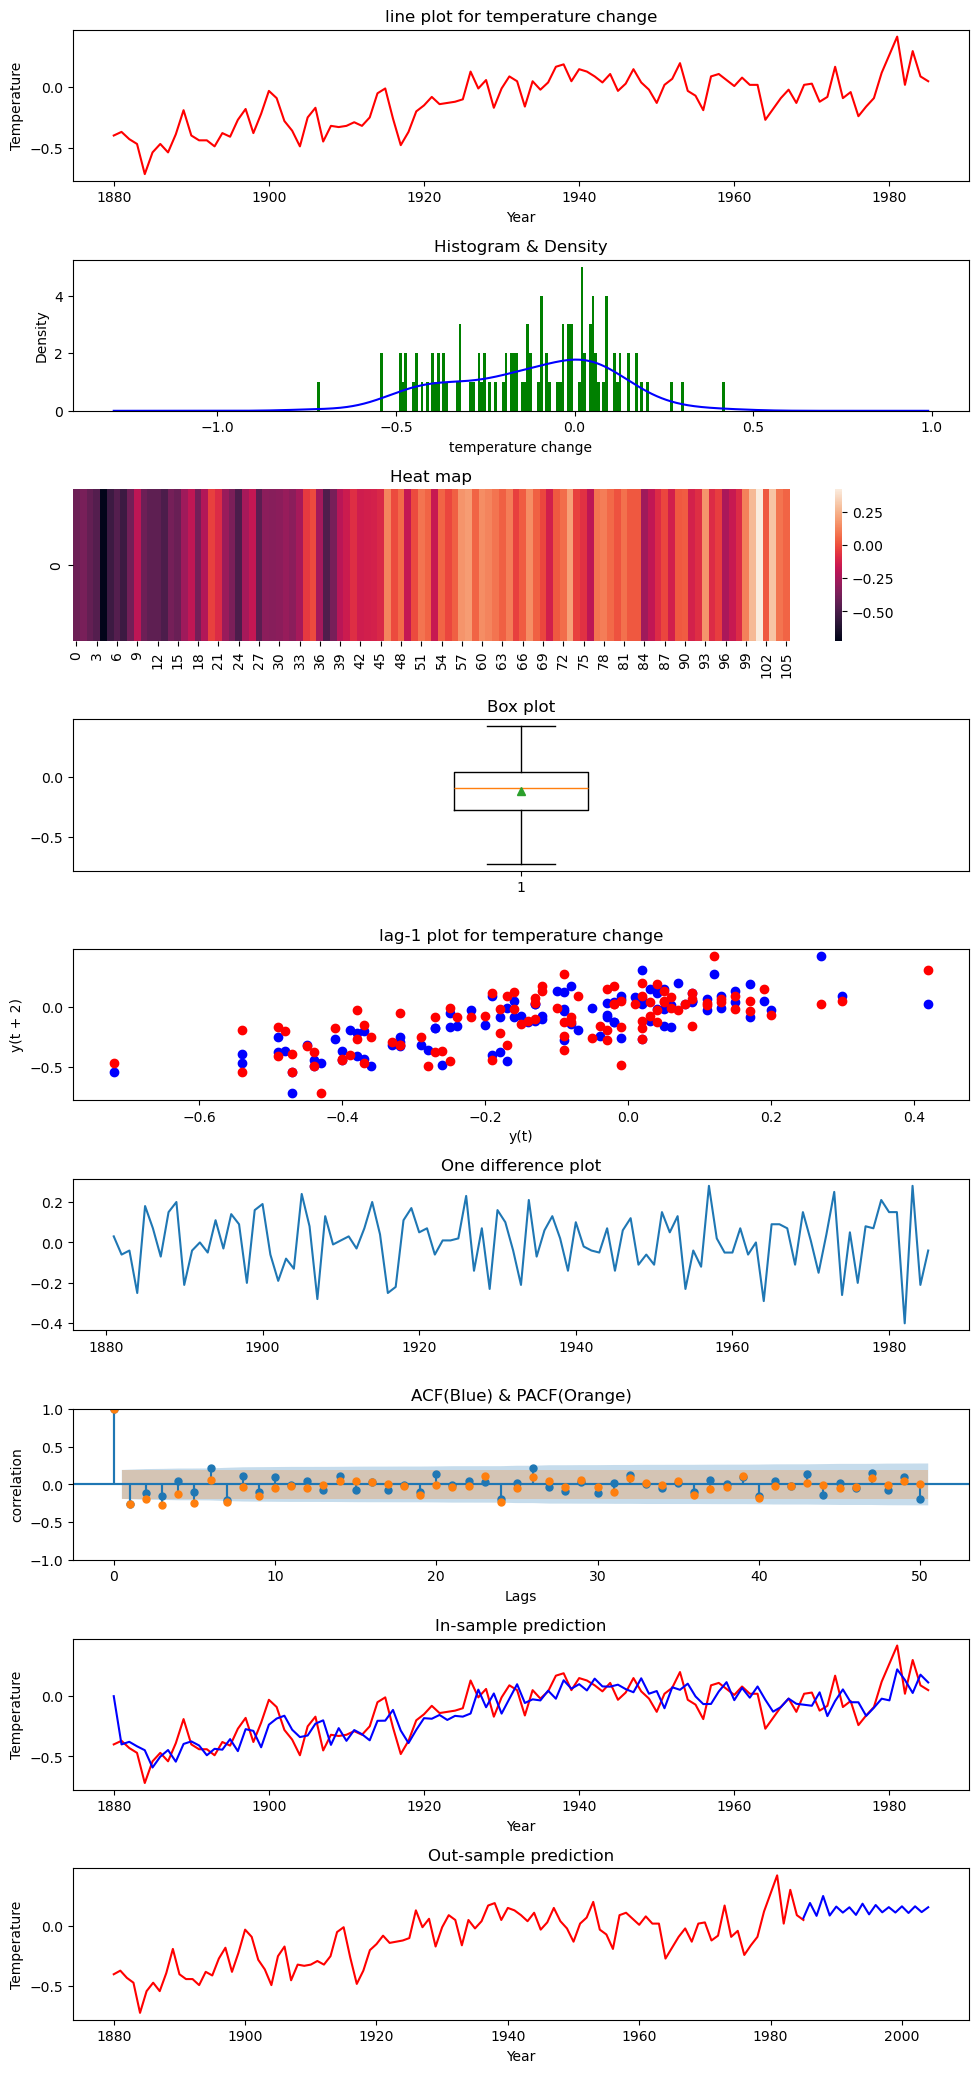

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test
from statsmodels.tsa.stattools import adfuller, arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

d = pd.read_csv('temperature.csv')
y = d["year"]
t = d["temperature change"]

# line plot
plt.figure(figsize = (10, 25))
ax = plt.subplot(11,1,1)
ax.set_title('line plot for temperature change') 
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.tight_layout()
plt.plot(y, t, color = 'red')

#histogram & density
ax = plt.subplot(11,1,2)
ax.set_title('Histogram & Density')
plt.xlabel('temperature change')
plt.ylabel('Counts')
plt.tight_layout()
plt.hist(t, bins = 150, color = 'green')
t.plot(kind = 'kde', color = 'blue')

#heat map
all = np.array([t, y])
ax = plt.subplot(11,1,3)
ax.set_title('Heat map')
plt.tight_layout()
plot = sns.heatmap([t])

#box plot
ax = plt.subplot(11,1,4)
ax.set_title('Box plot')
plt.tight_layout()
ax.boxplot(t, showmeans = True)

#lag-1 plot
ax = plt.subplot(11,1,5)
ax.set_title('lag-1 plot for temperature change') 
plt.tight_layout()
pd.plotting.lag_plot(t, c = 'blue')
pd.plotting.lag_plot(t, lag = 2, c = 'red')

#lb test
lb = lb_test(t, lags = 20)
print(lb)

#test stationarity
sta0 = adfuller(t)
print(sta0)

#one difference operation
ax = plt.subplot(11,1,6)
diff1 = t.diff(1)
ax.set_title('One difference plot')
plt.plot(y, diff1)
diff1 = diff1[1:106]
sta1 = adfuller(diff1)
print(sta1)

#acf, pacf -> p = 7, q = 1
ax = plt.subplot(11,1,7)
plot_acf(diff1, ax, 50)
plot_pacf(diff1, ax, 50, title='ACF(Blue) & PACF(Orange)')
plt.tight_layout()
plt.xlabel('Lags')
plt.ylabel('correlation')

#parameter choose
#trend_evaluate = sm.tsa.arma_order_select_ic(diff1, ic=['aic', 'bic'], trend='n', max_ar=20, max_ma=10)
#print('AIC', trend_evaluate.aic_min_order)
#print('BIC', trend_evaluate.bic_min_order)

ax = plt.subplot(11,1,8)
model = sm.tsa.statespace.SARIMAX(t, order = (7, 1, 1))
model = model.fit()
predictions = model.predict()
plt.xlabel('Year')
plt.ylabel('Temperature')
ax.set_title('In-sample prediction')
plt.tight_layout()
plt.plot(y, t, color = 'red')
plt.plot(y, predictions, color = 'blue')

#check model
res = predictions - t;
lb = lb_test(res, lags = 20)
print(lb)
print('mse:', mse(t, predictions))

#forecasting
ax = plt.subplot(11,1,9)
fore = model.forecast(20)
plt.xlabel('Year')
plt.ylabel('Temperature')
ax.set_title('Out-sample prediction')
plt.tight_layout()
plt.plot(y, t, color = 'red')
yy = np.arange(y[105], y[105]+20)
plt.plot(yy, fore, color = 'blue')

plt.savefig('./l2t5.jpg')
plt.show()


# Task6: Series transformation

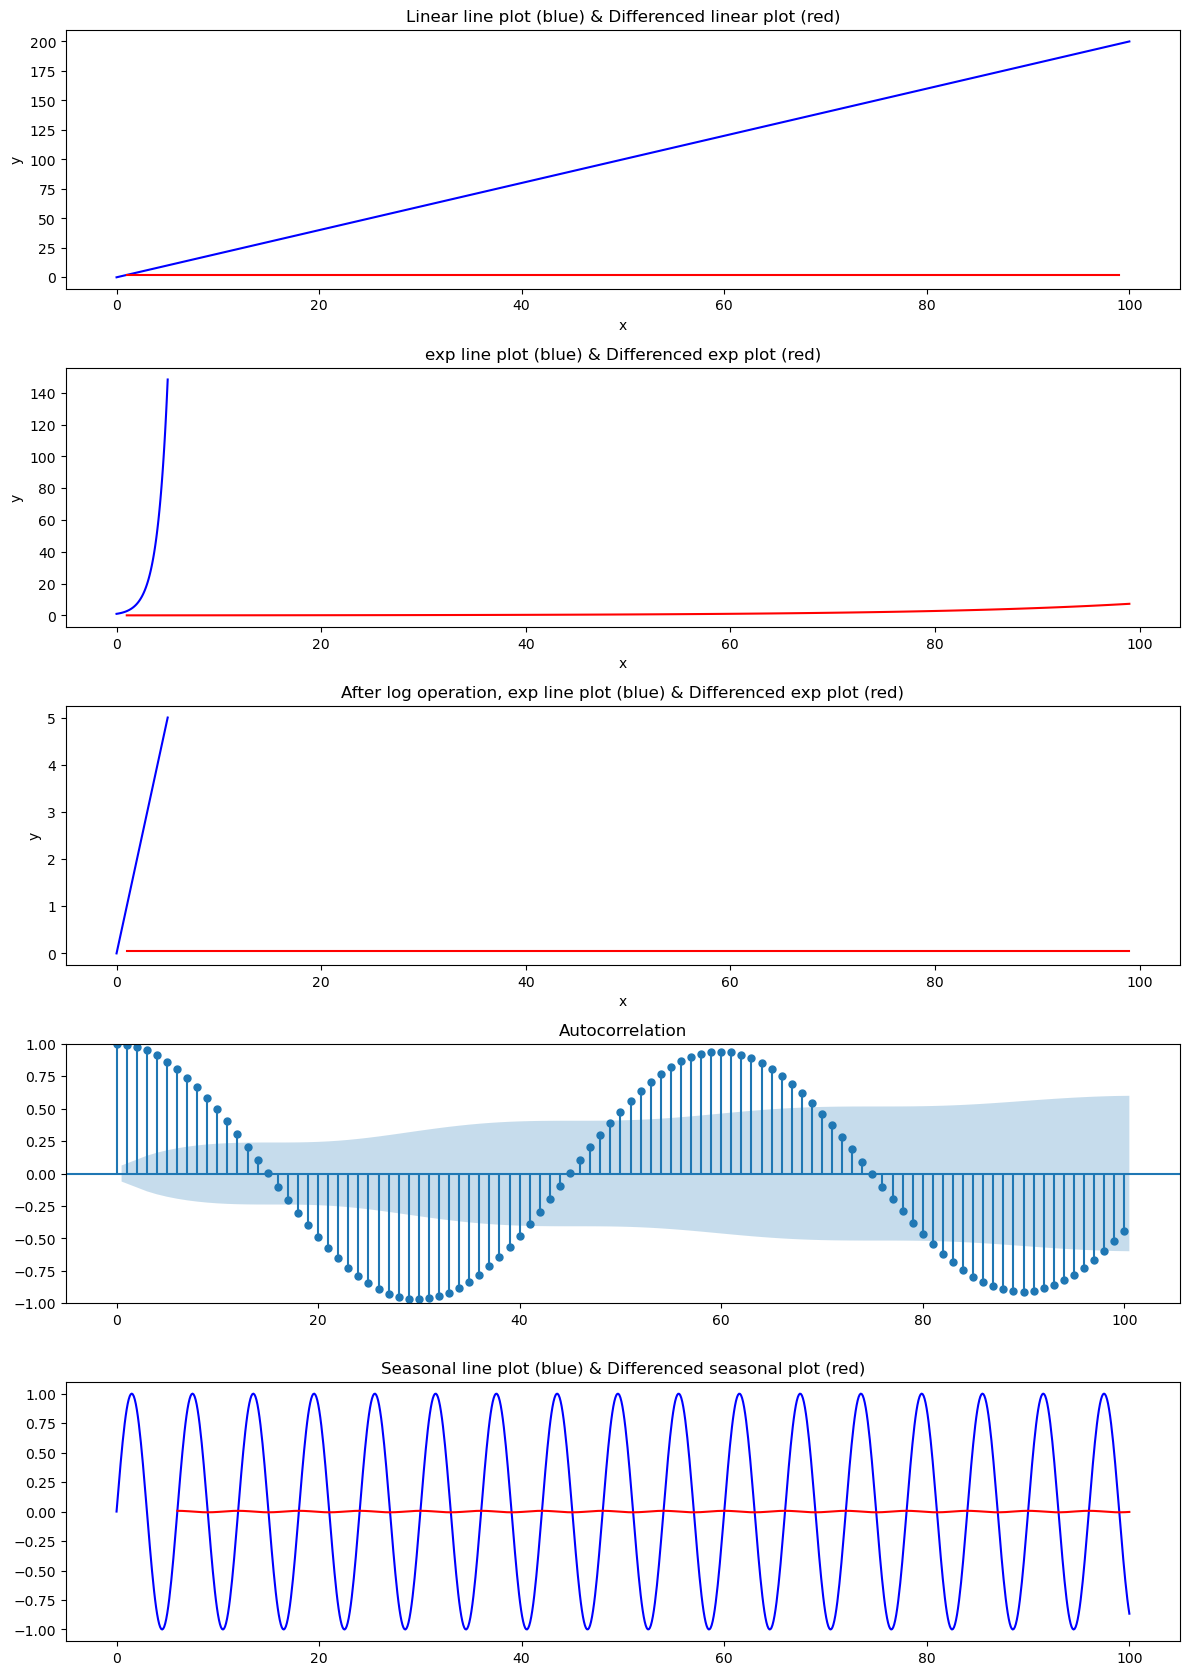

In [65]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import math

# verify differencing to linear trend
x1 = np.linspace(0, 100, 100)
y1 = 2 * x1
y1 = pd.Series(y1, index = np.arange(100))
plt.figure(figsize = (12, 20))
ax = plt.subplot(611)
plt.plot(x1, y1, c = 'blue')
diffy1 = y1.diff(1)
diffy1 = diffy1[1:100]
plt.plot(diffy1, c = 'red')
plt.xlabel('x')
plt.ylabel('y')
ax.set_title('Linear line plot (blue) & Differenced linear plot (red)') 
plt.tight_layout()

# verify differencing to exp trend
ax = plt.subplot(612)
x2 = np.linspace(0, 5, 100)
y2 = np.exp(x2)
y2 = pd.Series(y2)
plt.plot(x2, y2, c = 'blue')
diffy2 = (y2.diff(1))[1:100]
plt.plot(diffy2, c = 'red')
plt.xlabel('x')
plt.ylabel('y')
ax.set_title('exp line plot (blue) & Differenced exp plot (red)') 
plt.tight_layout()
y22 = np.log(y2)
ax = plt.subplot(613)
plt.plot(x2, y22, c = 'blue')
diffy22 = (y22.diff(1))[1:100]
plt.plot(diffy22, c = 'red')
plt.xlabel('x')
plt.ylabel('y')
ax.set_title('After log operation, exp line plot (blue) & Differenced exp plot (red)') 
plt.tight_layout()

# verify differencing to seasonal trend
x3 = np.linspace(0, 100, 1000)
y3 = np.sin(math.pi * x3 / 3)            # T = 6, sample freq = 10Hz
y3 = pd.Series(y3)
ax = plt.subplot(614)
plot_acf(y3, ax, 100)
plt.tight_layout()
ax = plt.subplot(615)
diffy3 = y3.diff(60)     # T * f = 60
ax.set_title('Seasonal line plot (blue) & Differenced seasonal plot (red)') 
plt.plot(x3, y3, c = 'blue')
plt.plot(x3, diffy3, c = 'red')

plt.savefig('./l2t6.jpg')
plt.show()

